# Analiza rynku wynajmu mieszkań we Wrocławiu

## Dane : Badany zbiór danych dotyczy ofert wynajmu mieszkań we Wrocławiu dostępnych na platformie Otodom za okres 1-22 marca.
## Cela analizy : Znalezienie top 5 atrakcyjnych ofert wanajmu mieszkania 
### Parametry atrakcyjnej oferty potrzebnych do analizy: 
#### -Dzielnica
#### -Cena, Czynsz
#### -Powierzchnia
#### -Typ budynku
#### -Oferta prywatna czy biurowa
#### -Pełne wyposażenie

#### 1. Podłączenie niezbędnych bibliotek oraz załadowanie danych

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick
import seaborn as sns

In [4]:
otodom = pd.read_csv("dane/otodom_all.csv", sep=";")
# Konwersja kolumny 'powierzchnia_mkw' na typ numeryczny
otodom['powierzchnia_mkw'] = pd.to_numeric(otodom['powierzchnia_mkw'], errors='coerce')
#Informacja na temat danych
print(otodom.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4922 entries, 0 to 4921
Data columns (total 74 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   link                       4922 non-null   object 
 1   nr_otodom_czas1            2430 non-null   float64
 2   nr_biuro_czas1             1353 non-null   object 
 3   dodano_czas1               2430 non-null   float64
 4   aktualizacja_czas1         2430 non-null   float64
 5   nr_otodom_czas2            2594 non-null   float64
 6   nr_biuro_czas2             1408 non-null   object 
 7   dodano_czas2               2594 non-null   float64
 8   aktualizacja_czas2         2594 non-null   float64
 9   nr_otodom_czas3            2574 non-null   float64
 10  nr_biuro_czas3             1394 non-null   object 
 11  dodano_czas3               2574 non-null   float64
 12  aktualizacja_czas3         2574 non-null   float64
 13  nr_otodom_czas4            2584 non-null   float

#### 2.Analiza wystąpień ofert wg. lokalizacji (Dzielnica)


##### W ramach analizy danych z serwisu Otodom przeanalizowaliśmy częstość wystąpień ofert wynajmu mieszkań w poszczególnych dzielnicach. Wykres przedstawiający częstość ofert dla top 10 dzielnic wskazuje na następujące obserwacje:


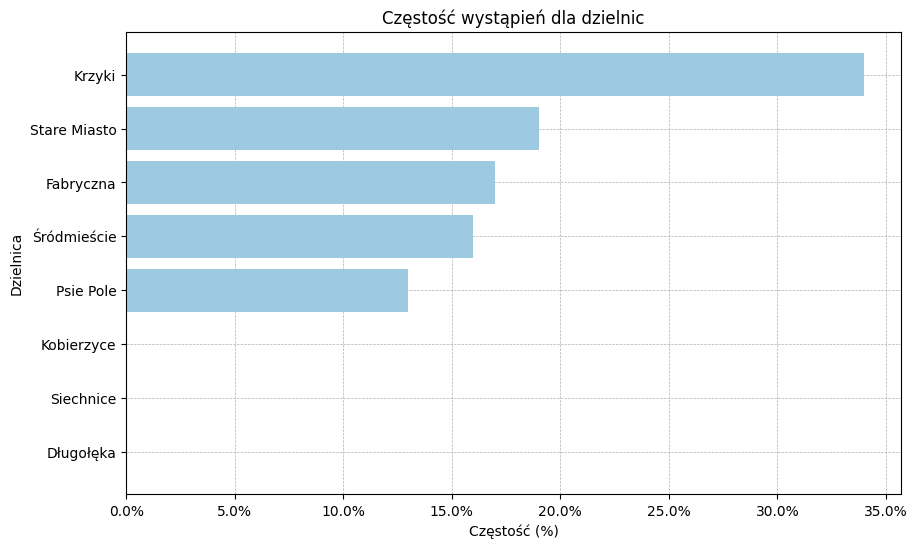

In [5]:
tab_dzielnica = otodom.groupby('dzielnica').size().reset_index(name="Ilerazy")
tab_dzielnica['Frekwencja'] = tab_dzielnica["Ilerazy"] / tab_dzielnica["Ilerazy"].sum()
tab_dzielnica = tab_dzielnica.sort_values(by="Frekwencja", ascending=False)
tab_dzielnica_8 = tab_dzielnica.iloc[:8, :]
tab_dzielnica_8 = tab_dzielnica_8.sort_values(by="Frekwencja", ascending=True)
tab_dzielnica_8['Frekwencja'] = tab_dzielnica_8["Frekwencja"].transform(lambda x: f"{100*x:.0f}%")
tab_dzielnica_8;

#Przygotowanie wykresu % wystąpień ofert wg. dzielnicy
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.barh(tab_dzielnica_8['dzielnica'], tab_dzielnica_8['Frekwencja'].str.rstrip('%').astype(float) / 100, color='#9ecae1', zorder=2)
ax.set(title='Częstość wystąpień dla dzielnic', xlabel="Częstość (%)", ylabel="Dzielnica")
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.show()


##### Wniosek:
##### -Krzyki: Największa liczba ofert wynajmu pochodzi z dzielnicy Krzyki, która jest najpopularniejszą dzielnicą pod względem liczby ofert.
##### -Stare Miasto: Drugą w kolejności dzielnicą z dużą liczbą ofert jest Stare Miasto, co może sugerować atrakcyjność lokalizacji blisko centrum.
##### -Fabryczna, Śródmieście, Psie Pole: Te dzielnice również mają znaczącą liczbę ofert, co może wskazywać na ich popularność wśród najemców.
##### -Długołęka, Siechnice, Kobierzyce: Chociaż te miejscowości pod Wrocławiem mają najmniejszą liczbę ofert, ze wzgłedu na małą populację nie są branę pod uwagę w dalszej analizie.

#### 3.Analiza średnich cen i czynszów dla każdej dzielnicy.

##### Cel: Celem analizy było znalezienie i wyfiltrowanie dzielnic oferujących najlepsze warunki wynajmu mieszkań pod względem ceny wynajmu oraz czynszu. W szczególności skupiliśmy się na średnich cenach oraz medianach dla wybranych dzielnic, aby zidentyfikować najbardziej atrakcyjne lokalizacje.

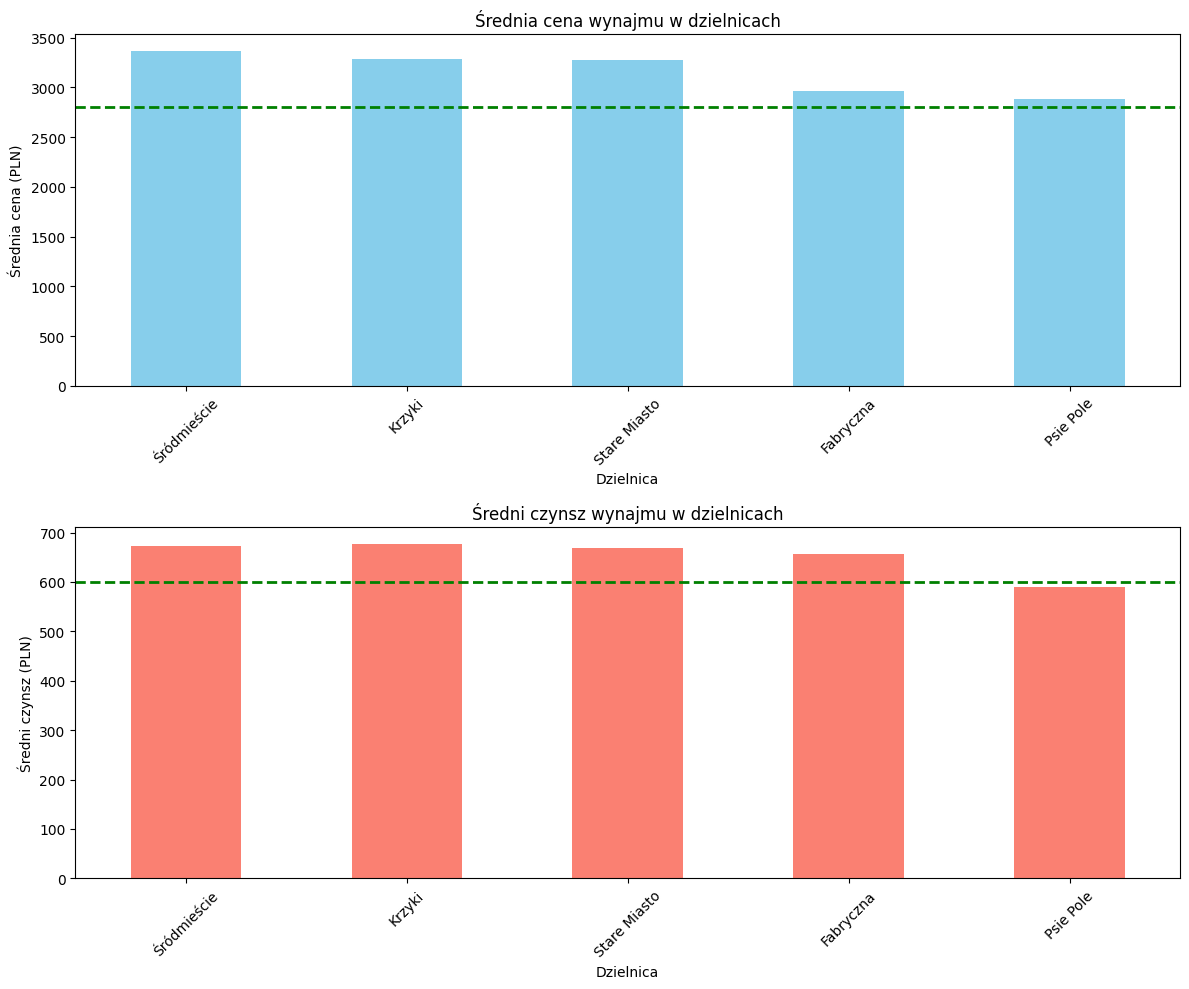

In [6]:
# Wybór dzielnic o najwyższej liczbie ofert
dzielnice = ['Krzyki', 'Stare Miasto', 'Fabryczna', 'Śródmieście', 'Psie Pole']

# Filtrowanie tylko dla wybranych dzielnicdzielnic
filtrowane_dzielnice = otodom[otodom['dzielnica'].isin(dzielnice)]

# Obliczenie średniej ceny i czynszu dla każdej dzielnicy
srednia_cena_wynajmu = filtrowane_dzielnice.groupby('dzielnica').agg({'cenaPLN': 'mean', 'czynszPLN': 'mean'}).reset_index()
srednia_cena_wynajmu = srednia_cena_wynajmu.sort_values(by='cenaPLN', ascending=False)

mediana_cen = filtrowane_dzielnice['cenaPLN'].median()
mediana_czynsz = filtrowane_dzielnice['czynszPLN'].median()

# Plot for average prices with median line
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Plot for average prices
srednia_cena_wynajmu.plot(kind='bar', x='dzielnica', y='cenaPLN', ax=ax[0], color='skyblue', legend=False)
ax[0].axhline(mediana_cen, color='green', linestyle='--', linewidth=2, label=f'Mediana ceny: {mediana_cen:.2f} PLN')
ax[0].set_title('Średnia cena wynajmu w dzielnicach')
ax[0].set_xlabel('Dzielnica')
ax[0].set_ylabel('Średnia cena (PLN)')
ax[0].tick_params(axis='x', rotation=45)

# Plot for average rent
srednia_cena_wynajmu.plot(kind='bar', x='dzielnica', y='czynszPLN', ax=ax[1], color='salmon', legend=False)
ax[1].axhline(mediana_czynsz, color='green', linestyle='--', linewidth=2, label=f'Mediana czynszu: {mediana_czynsz:.2f} PLN')
ax[1].set_title('Średni czynsz wynajmu w dzielnicach')
ax[1].set_xlabel('Dzielnica')
ax[1].set_ylabel('Średni czynsz (PLN)')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Wniosek: Wybrano dzielnice Krzyki, Stare Miasto, Fabryczna, Śródmieście, i Psie Pole ze względu na najwyższą liczbę ofert wynajmu. Z tej grupy, do szczegółowej analizy wybrano trzy dzielnice: Krzyki, Stare Miasto i Fabryczna. Te dzielnice zostały wybrane ze względu na: 
Krzyki: Największa liczba ofert, co sugeruje dużą popularność i różnorodność ofert wynajmu. 
Stare Miasto: Centralna lokalizacja, bliskość do głównych atrakcji i centrów biznesowych. 
Fabryczna: Umiarkowane ceny i różnorodność ofert w porównaniu do innych dzielnic.

#### 4. Analiza ofert w wybranych dzielnicach wg. wybranego przedziału powierzchniowym (30-40 m2)

##### Celem analizy było znalezienie dzielnicy z największą liczbą ofert wynajmu mieszkań o powierzchni od 30 do 40 m² w trzech wybranych dzielnicach: Krzyki, Stare Miasto, Fabryczna.

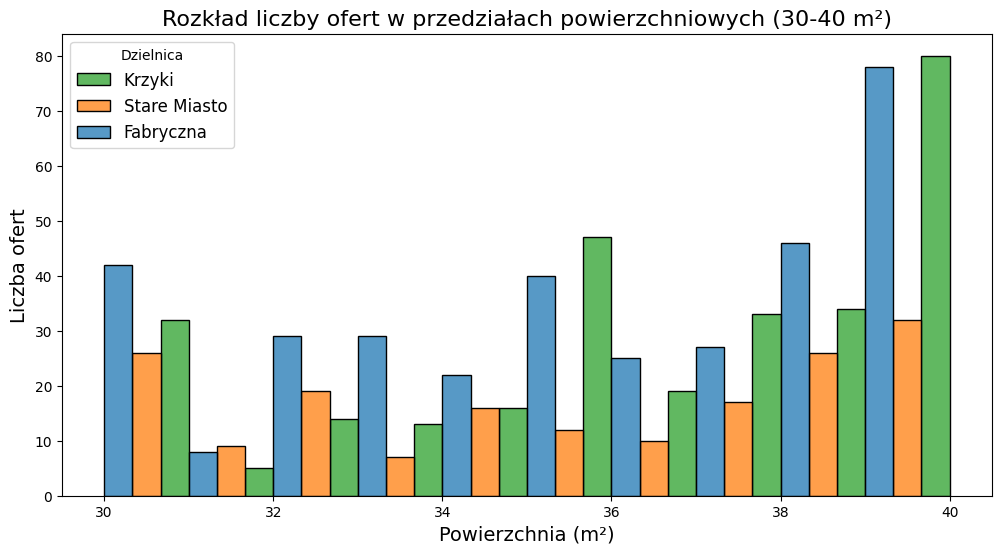

In [7]:
dzielnice = ['Krzyki', 'Stare Miasto', 'Fabryczna']
filtered_otodom = otodom[(otodom['dzielnica'].isin(dzielnice)) & 
                         (otodom['powierzchnia_mkw'] >= 30) & 
                         (otodom['powierzchnia_mkw'] <= 40)]

# Histogram - liczba ofert w różnych przedziałach powierzchniowych
plt.figure(figsize=(12, 6))
sns.histplot(data=filtered_otodom, x='powierzchnia_mkw', hue='dzielnica', multiple='dodge', bins=10, palette='tab10')
plt.title('Rozkład liczby ofert w przedziałach powierzchniowych (30-40 m²)', fontsize=16)
plt.xlabel('Powierzchnia (m²)', fontsize=14)
plt.ylabel('Liczba ofert', fontsize=14)
plt.legend(title='Dzielnica', labels=['Krzyki', 'Stare Miasto', 'Fabryczna'], fontsize=12)
plt.show()


Wniosek: Na podstawie wykresu przedstawiającego rozkład liczby ofert w przedziałach powierzchniowych (30-40 m²) dla wybranych dzielnic, możemy wyciągnąć następujące wnioski: dzielnica Fabryczna ma najwięcej ofert mieszkalnych o rozkładzie powerzchni z przedzialu od 30 do 40 m2. Fabryczna wydaje się być dzielnicą z największą różnorodnością ofert w analizowanym zakresie powierzchniowym. Mało tego, Fabryczna wyróżnia się również niższą ceną oraz czynszem wśród innych.

#### 5. Analiza opisowa ofert z przedziału powierzchni z dzielnicy Fabryczna wg. typu budynku oraz typu ogłoszenia  

Wniosek: Najwięcej ofert w dzielnice Fabryczna są typy budynków: Apartamentowiec oraz Blok. Wg. typu ogłoszeń wyróżnia się oferty z biura nieruchomości oraz od osób prywatnych. W celu dalszej analizy do znaleźienia atrakcyjnej oferty będą wybrane typ budynku Apartamentowiec, o powierzchni 30-40 m2.

In [8]:
# Filtrowanie danych dla Fabrycznej i powierzchni 30-40 m²
filtered_fabryczna = otodom[(otodom['dzielnica'] == 'Fabryczna') & 
                            (otodom['powierzchnia_mkw'] >= 30) & 
                            (otodom['powierzchnia_mkw'] <= 40)]
# Liczba ofert według typu budynku i typu ogłoszenia
typ_budynku_counts = filtered_fabryczna['typ_budynku'].value_counts()
typ_ogloszenia_counts = filtered_fabryczna['typ_ogloszeniodawcy'].value_counts()

# Wyświetlenie liczby ofert
print("Liczba ofert według typu budynku:")
print(typ_budynku_counts)
print("\nLiczba ofert według typu ogłoszenia:")
print(typ_ogloszenia_counts)

Liczba ofert według typu budynku:
typ_budynku
blok                100
apartamentowiec      42
kamienica             5
szeregowiec           3
dom wolnostojący      2
Name: count, dtype: int64

Liczba ofert według typu ogłoszenia:
typ_ogloszeniodawcy
biuro nieruchomości    91
prywatny               74
deweloper               9
Name: count, dtype: int64


In [9]:
# Statystyki opisowe dla cen i czynszów według typu budynku i typu ogłoszenia
statystyki_typ_budynku = filtered_fabryczna.groupby('typ_budynku')['cenaPLN'].describe()
statystyki_typ_ogloszenia = filtered_fabryczna.groupby('typ_ogloszeniodawcy')['cenaPLN'].describe()

# Wyświetlenie statystyk
print("Statystyki opisowe według typu budynku:")
print(statystyki_typ_budynku)
print("\nStatystyki opisowe według typu ogłoszenia:")
print(statystyki_typ_ogloszenia)

Statystyki opisowe według typu budynku:
                  count         mean         std     min     25%     50%  \
typ_budynku                                                                
apartamentowiec    42.0  2530.452381  382.675192  1750.0  2300.0  2575.0   
blok              100.0  2379.630000  326.880192  1700.0  2200.0  2340.0   
dom wolnostojący    2.0  2000.000000    0.000000  2000.0  2000.0  2000.0   
kamienica           5.0  2300.000000  404.660351  1950.0  2000.0  2200.0   
szeregowiec         3.0  2333.333333  152.752523  2200.0  2250.0  2300.0   

                     75%     max  
typ_budynku                       
apartamentowiec   2700.0  4000.0  
blok              2622.5  3051.0  
dom wolnostojący  2000.0  2000.0  
kamienica         2400.0  2950.0  
szeregowiec       2400.0  2500.0  

Statystyki opisowe według typu ogłoszenia:
                     count         mean         std     min     25%     50%  \
typ_ogloszeniodawcy                                        

#### 6. Analiza ofert w wybranej dzielnicy pod wzgłedem wyposażenia.

##### Celem analizy było zbadanie, jak dobrze wyposażone są mieszkania w dzielnicy Fabryczna o powierzchni 30-40 m², w typie budynku apartamentowiec. Dodatkowo, oferty były analizowane pod kątem wyposażenia, gdzie wyróżniono pięć kategorii: bez wyposażenia, słabo wyposażone, średnio wyposażone, dobrze wyposażone oraz w pełni wyposażone. Analiza wyposażenia ofert wynajmu mieszkań w dzielnicy Fabryczna pokazuje, że rynek preferuje mieszkania dobrze i średnio wyposażone. Dla właścicieli nieruchomości może to być sygnał do inwestowania w udogodnienia, aby lepiej spełniać oczekiwania najemców i zwiększać atrakcyjność swoich ofert.

equipment_category
Średnio wyposażony    25
Dobrze wyposażony     11
Słabo wyposażony       5
Bez wyposażenia        1
Name: count, dtype: int64


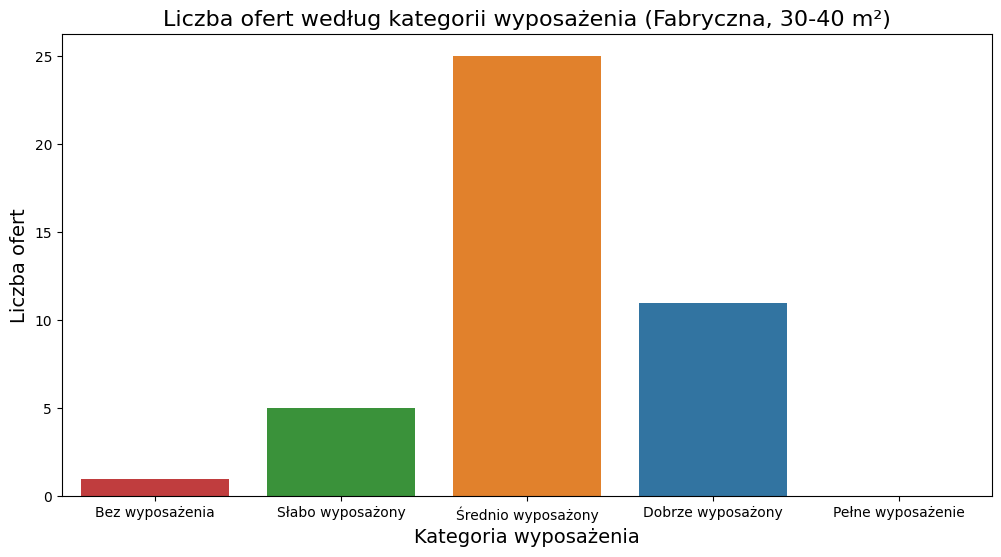

In [10]:
# Filtrowanie danych dla Fabrycznej, powierzchni 30-40 m², typu budynku apartamentowiec, ofert od osób prywatnych
filtered_fabryczna = otodom[(otodom['dzielnica'] == 'Fabryczna') & 
                            (otodom['powierzchnia_mkw'] >= 30) & 
                            (otodom['powierzchnia_mkw'] <= 40) & 
                            (otodom['typ_budynku'] == 'apartamentowiec')].copy()

# Kolumny z wyposażeniem
equip_columns = ['zmywarka', 'lodowka', 'meble', 'piekarnik', 'kuchenka', 'pralka', 'telewizor', 'telewizja_kablowa', 'internet', 'telefon']

# Obliczenie sumy wyposażenia dla każdej oferty
filtered_fabryczna.loc[:,'equip_sum'] = filtered_fabryczna[equip_columns].sum(axis=1)

# Przypisanie kategorii wyposażenia
def categorize_equipment(equip_sum):
    if equip_sum == 0:
        return 'Bez wyposażenia'
    elif 1 <= equip_sum <= 3:
        return 'Słabo wyposażony'
    elif 4 <= equip_sum <= 7:
        return 'Średnio wyposażony'
    elif 8 <= equip_sum <= 9:
        return 'Dobrze wyposażony'
    elif equip_sum == 10:
        return 'Pełne wyposażenie'

filtered_fabryczna.loc[:,'equipment_category'] = filtered_fabryczna['equip_sum'].apply(categorize_equipment)

# Wyświetlenie liczby ofert w każdej kategorii wyposażenia
equipment_counts = filtered_fabryczna['equipment_category'].value_counts()
print(equipment_counts)

# Wykres liczby ofert w poszczególnych kategoriach wyposażenia
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_fabryczna, x='equipment_category', hue='equipment_category' ,palette='tab10', order=['Bez wyposażenia', 'Słabo wyposażony', 'Średnio wyposażony', 'Dobrze wyposażony', 'Pełne wyposażenie']);
plt.title('Liczba ofert według kategorii wyposażenia (Fabryczna, 30-40 m²)', fontsize=16);
plt.xlabel('Kategoria wyposażenia', fontsize=14);
plt.ylabel('Liczba ofert', fontsize=14);
plt.show();

Wniosek: Z powyższego wykresu wynika że najwięcej jest ofert średnio wyposażonych jest ich 25 z 42 ofert. W dalszej analizie będziemy zwracać uwagę tylko na oferty z Dobrym wyposażeniem.

#### 7.Podsumowanie

In [11]:
filtered_fabryczna.loc[:,'equipment_category'] = filtered_fabryczna['equip_sum'].apply(categorize_equipment)

# Filtr dla ofert z dobrym wyposażeniem
well_equipped = filtered_fabryczna[filtered_fabryczna['equipment_category'] == 'Dobrze wyposażony']

# Sortowanie według ceny
top_5_offers = well_equipped.sort_values(by='cenaPLN',ascending= True).head(5)

# Wybrane kolumny
columns_to_show = ['link', 'ulica', 'okolica', 'tytul', 'cenaPLN', 'czynszPLN', 'powierzchnia_mkw', 'typ_ogloszeniodawcy',
                   'zmywarka', 'lodowka', 'meble', 'piekarnik', 'kuchenka', 'pralka', 'telewizor', 'telewizja_kablowa', 'internet', 'telefon', ]

# Wyświetlenie top 5 ofert
top_5_offers_to_show = top_5_offers[columns_to_show]
top_5_offers_to_show


,link,ulica,okolica,tytul,cenaPLN,czynszPLN,powierzchnia_mkw,typ_ogloszeniodawcy,zmywarka,lodowka,meble,piekarnik,kuchenka,pralka,telewizor,telewizja_kablowa,internet,telefon
956,https://www.otodom.pl/pl/oferta/apartament-leg...,ul. Legnicka 57,Popowice Północne,Apartament LEGNICKA STREET 2017 LUX Klimatyzacja,2199.0,600.0,30.0,prywatny,0,1,1,1,1,1,1,1,1,1
3306,https://www.otodom.pl/pl/oferta/do-wynajecia-n...,ul. Władysława Zarembowicza,Strachowice,do wynajęcia nowe mieszkanie Wrocław Zarembowicza,2200.0,700.0,32.0,prywatny,0,1,1,0,1,1,1,1,1,1
84,https://www.otodom.pl/pl/oferta/nowoczesne-mie...,ul. Legnicka,Popowice Północne,Nowoczesne mieszkanie Pixel House. DOSTĘPNE,2300.0,500.0,31.0,prywatny,1,1,1,1,1,1,0,1,1,0
1121,https://www.otodom.pl/pl/oferta/wynajem-mieszk...,ul. Chociebuska,Nowy Dwór,Wynajem mieszkania,2600.0,400.0,30.0,prywatny,1,1,1,1,1,1,1,0,1,0
278,https://www.otodom.pl/pl/oferta/apartamenty-z-...,ul. Piastowska,Oporów,Apartamenty★ Z tarasem★gotowe do zamieszkania,2650.0,600.0,39.0,biuro nieruchomości,1,1,1,1,0,1,1,1,1,1


Wnioski z analizy: Na podstawie przeprowadzonej analizy udało się osiągnąć cel : Znalezienie top 5 atrakcyjnych ofert wynajmu mieszkania. Powyżej znajduje się tabela zawierająca wszystkie niezbędne informacje odnośnie oferty wynajmu.